In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


## Dataset Information

We own a supermarket mall and through membership cards, we have some basic data about our customers. We want to understand the customers who can be converge to Target customers to give the marketing team more sense to plan a good marketing strategy.

## Attributes

- Customer ID
- Age
- Gender
- Annual income
- Spending score (Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.)

## Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Pre-processing the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing values.

## Data Analysis

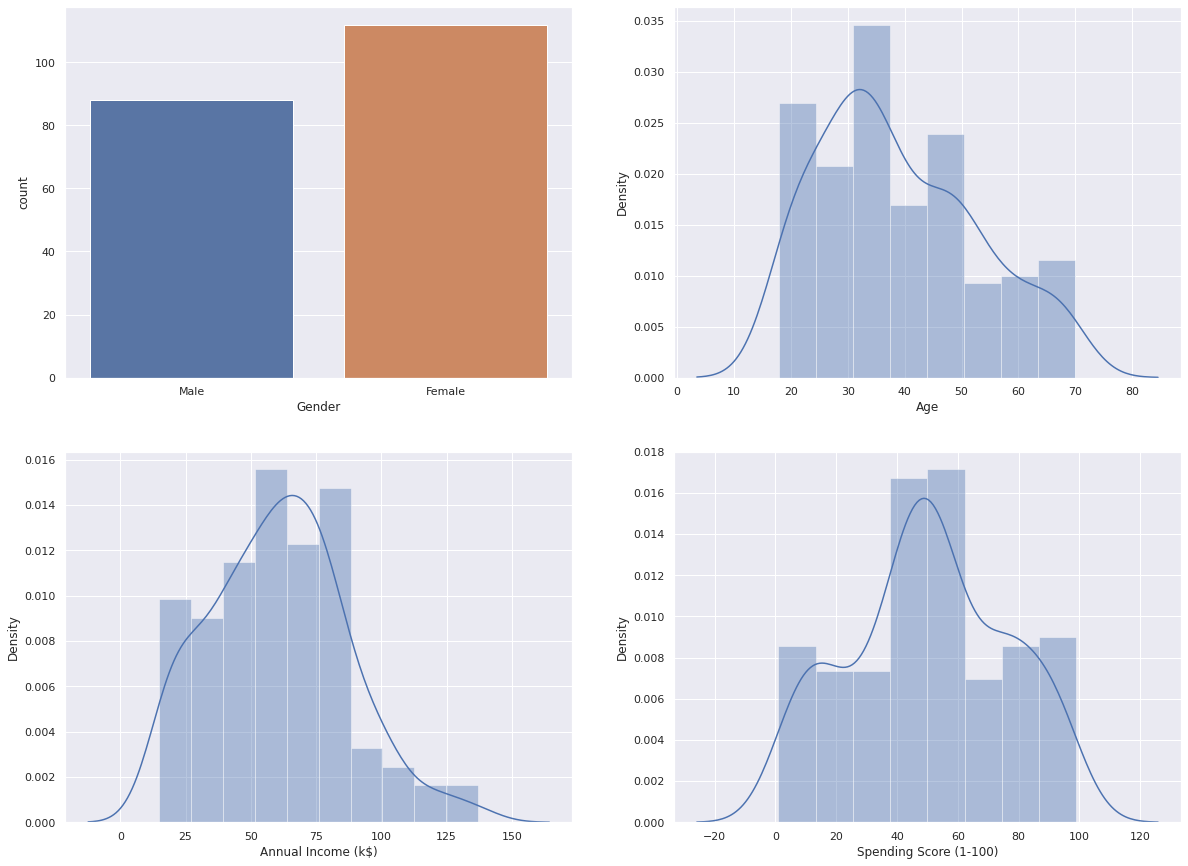

In [6]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2,2, figsize=(20,15))

sns.countplot(df['Gender'], ax= axs[0,0])
sns.distplot(df['Age'], ax=axs[0,1])
sns.distplot(df['Annual Income (k$)'], ax=axs[1,0])
sns.distplot(df['Spending Score (1-100)'], ax = axs[1,1])
plt.show()

## Correlation Matrix

<AxesSubplot:>

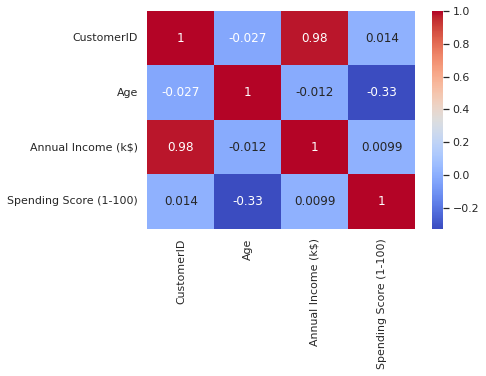

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Clustering

In [8]:
new_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
new_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

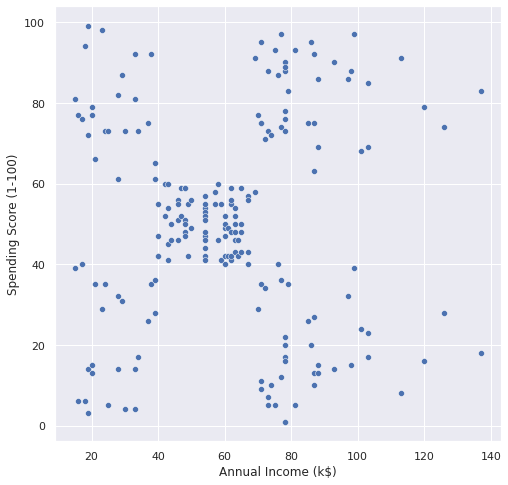

In [9]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'])

## Elbow Method

In [10]:
sq_err = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    sq_err.append(km.inertia_)

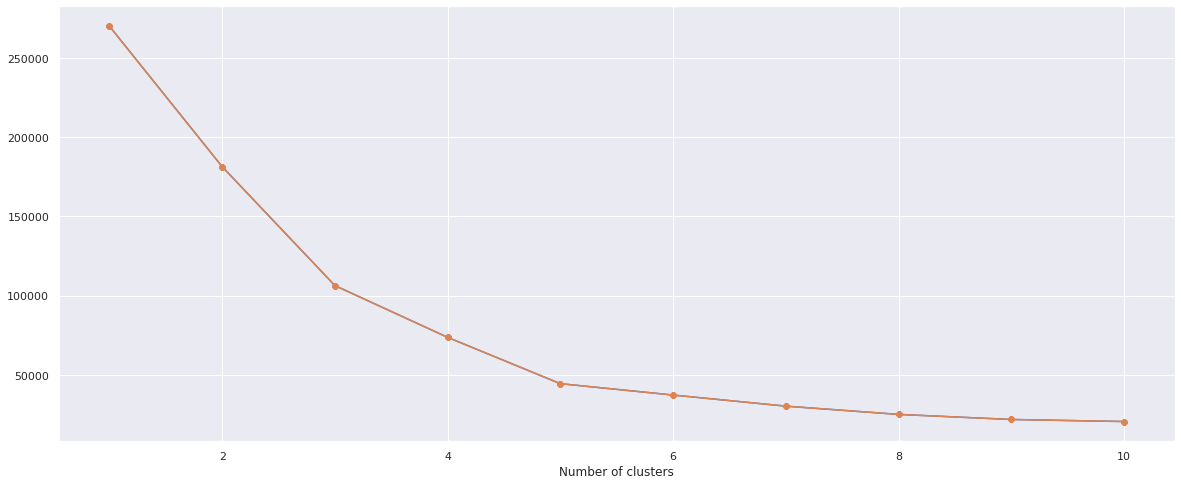

In [11]:
plt.figure(figsize=(20,8))
plt.plot(range(1,11), sq_err)
plt.plot(range(1,11), sq_err, marker='8')
plt.xlabel('Number of clusters')
plt.show()

In [12]:
km = KMeans(n_clusters=5)
km.fit(new_df)
y = km.predict(new_df)
new_df['Label'] = y
new_df.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

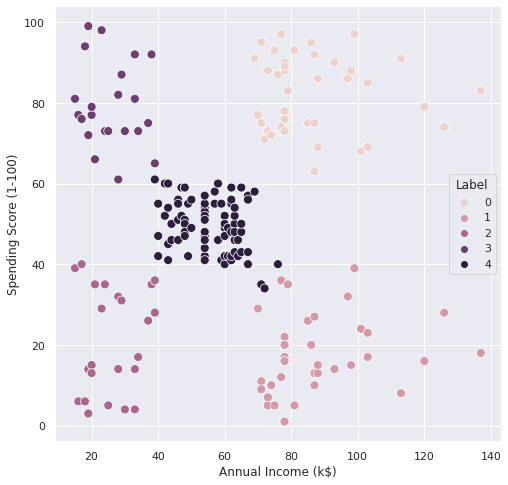

In [13]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=new_df, hue='Label', s=80)

Cluster on 3 features

In [14]:
new_df3 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
new_df3.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


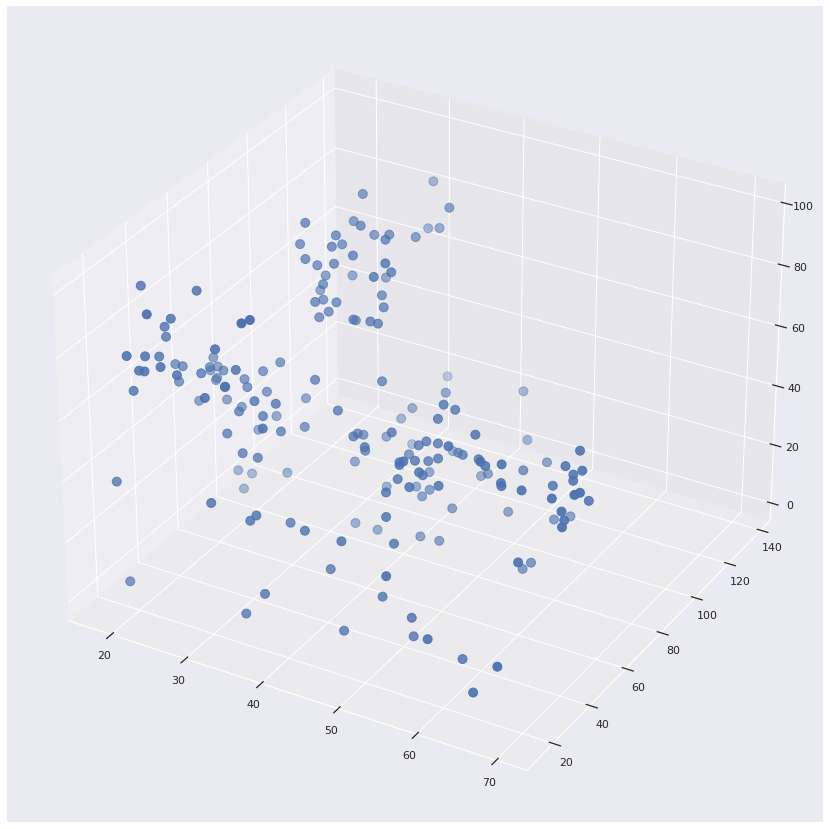

In [15]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_df3['Age'], new_df3['Annual Income (k$)'], new_df3['Spending Score (1-100)'], s=80)

plt.show()

## Elbow Method

In [16]:
sq_err = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df3)
    sq_err.append(km.inertia_)

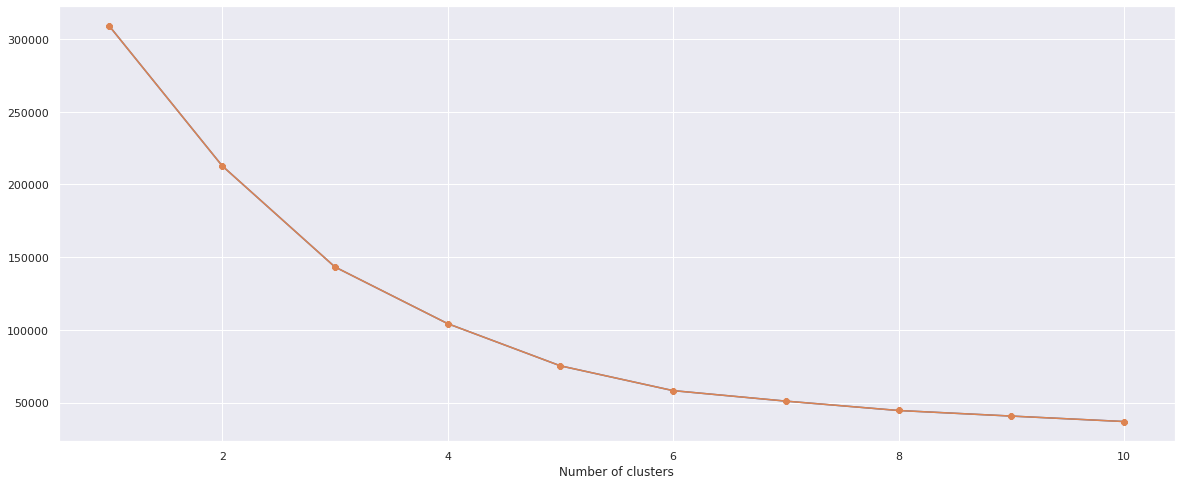

In [17]:
plt.figure(figsize=(20,8))
plt.plot(range(1,11), sq_err)
plt.plot(range(1,11), sq_err, marker='8')
plt.xlabel('Number of clusters')
plt.show()

In [18]:
km = KMeans(n_clusters=5)
km.fit(new_df3)
y = km.predict(new_df3)
new_df3['Label'] = y
new_df3.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,0
1,15,81,21,3
2,16,6,20,0
3,16,77,23,3
4,17,40,31,0


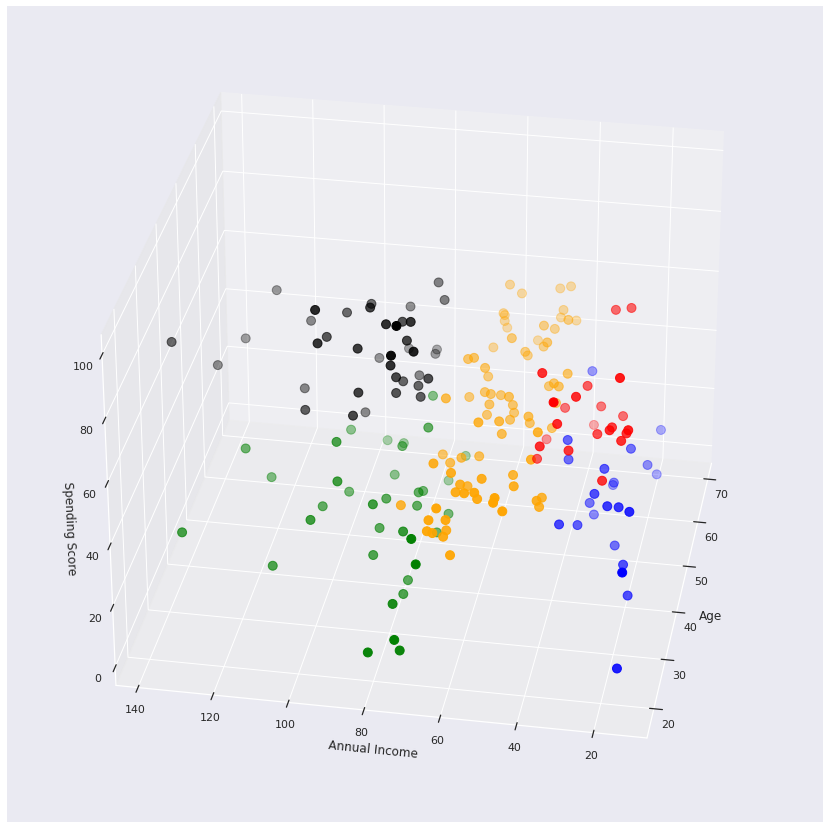

In [19]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

j = 0
ch = ['blue','black','green','red','orange']
for i in ch:
    ax.scatter(new_df3['Age'][new_df3['Label']==j], new_df3['Annual Income (k$)'][new_df3['Label']==j], new_df3['Spending Score (1-100)'][new_df3['Label']==j], c=i, s=80)
    j=j+1

ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()